# Lab 8  -  Spectroscopic binary star

In this lab you will look at the orbit of a spectroscopic binary star!

Make sure to read the instructions carefully and answer any written questions within the notebook.


Astronomy skills:
- binary stars
- stellar masses


Python skills:
- calling functions







## Set up
Run the cell below to read in the packages you'll need for this lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Intro to python functions

We are going to practice using a pre-written python "function" in this lab.

In general, functions are predefined blocks of code that take input options and produce specific outputs. They are very useful if you need to do the same calculation several times, so you only have to write the code once and then "call" the function each time you want to use it. You call the function with specific input information, then the function will give back the answer as an output.

To write a function, you need to give your function a name, tell it what the input variable(s) should be, and tell it what variable(s) should be output.
```
def function_name(input):
    code to do stuff
    code to do stuff
    code to do stuff  
    return(output)
```



Then you can execute the function to get the output:
```
output = function_name(input)
```

The cell below shows an example of a function that we will be using for this lab.

## Step 1 - Model radial velocity curve

We measure how the radial velocities vary over time and define several "orbital parameters":
- **center of mass velocity** (V0) = speed the entire system is moving relative to Earth
- **velocity semiamplitude** (K1, K2) = max speed of each star relative to the center of mass
- **orbital period** (P) = time it takes to orbit once

If you specifiy each of these parameters, you could predict how fast each star would move in it's orbit.

The function below does exactly that -- if you input the period, systemic velocity, and velocity semiamplitudes, the function will tell you what the RV of star 1 and star 2 would be. Run the cell below so python learns the function.


In [2]:
# function to calculate RV of a binary system for given orbital parameters
#   (note, this is only for circular orbits!)

def model_RV(time, period, V0, K1, K2):
    rv1 = K1 * np.cos(2*np.pi*time/period) + V0
    rv2 = -1* K2 * np.cos(2*np.pi*time/period) + V0
    return(rv1, rv2)


Now we can test the function! Complete the middle line of code to call the `model_RV` function and get back the velocities of star 1 and star 2 (in variables called `rv1` and `rv2`).

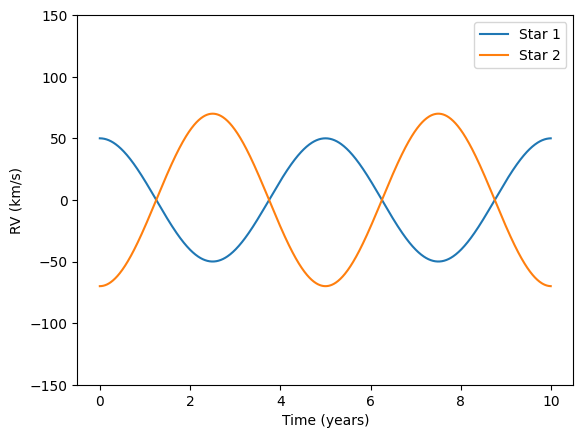

In [3]:
# time of fake osbervations in years
time = np.arange(0, 10, 0.01)


# -----------------------------
# ORBITAL PARAMETERS
# orbital period in years
period = 5

# center of mass velocity in km/s
V0 = 0

# velocity semiamplitude of star 1 in km/s
K1 = 50

# velocity semiamplitude of star 2 in km/s
K2 = 70


# MODEL RADIAL VELOCITIES
# complete this line of code:
model_rv1, model_rv2 = model_RV(time, period, V0, K1, K2)

# -----------------------------


# plot RV curve
plt.plot(time, model_rv1, label='Star 1')
plt.plot(time, model_rv2, label='Star 2')
plt.ylim(-150, 150)
plt.xlabel('Time (years)')
plt.ylabel('RV (km/s)')
plt.legend()


**Questions**
1. Try a few different values for the orbital period (anything between 1-10 years), then describe how the the shape of the RV curve changes when you increase the orbital period.

In [4]:
# answer here

# Increasing the orbital period makes the graph stretch out in time, since it takes longer for the stars to orbit


2. Try a few different values for the center of mass velocity (anything between -100 to 100 km/s), then describe how the the shape of the RV curve changes when you increase this value.

In [5]:
# answer here

# Increasing the center of mass velocity shifts the RV curve up since the whole system is moving away from us

3. Try a few different values for the velocity semiamplitudes of each star (anything between 1 to 100 km/s), then describe how the the shape of the RV curve changes when you increase the semiamplitudes.

In [6]:
# answer here

# Increasing the semiamplitude stretches the graph vertically, since the stars have more extreme speeds

## Step 2 - Observed data

The file "binary_RV.csv" in the lab folder contains the measured radial velocities for a binary star over time.

1. Read in the data file

2. Make a scatter plot of the RV curve for both stars (on the same plot). Make sure your plot has axis labels!

3. [optional bonus] Give your plot a legend so you know which star is which.

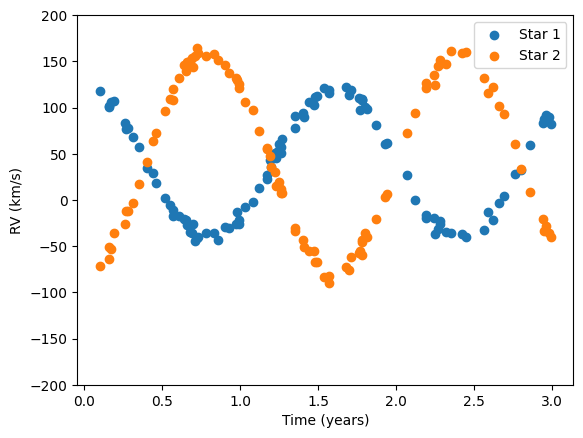

In [8]:
# code here
time, rv1, rv2 = np.loadtxt('binary_RV.csv', delimiter=',', skiprows=1, unpack=True)

# plot RV curve
plt.scatter(time, rv1, label='Star 1')
plt.scatter(time, rv2, label='Star 2')
plt.ylim(-200, 200)
plt.xlabel('Time (years)')
plt.ylabel('RV (km/s)')
plt.legend()


**Question:** Based on the graph, do the two stars have the same max speed? What does this tell us about their masses?

In [9]:
# answer here

# No, Star 1 has a lower max speed so it must be more massive than Star 2

## Step 3 - fitting the data

Let's put it all together!

1. Copy your plot of the observed RV curve from Step 2 into the cell below

2. From the code in Step 1 above, copy the blocks defining the orbital parameters and running the function (between the dashed line) into the cell below.

3. Update the function to use the time array of the observed data as an input.

4. Update the plot to overplot the model RVs on top of the observed RVs

5. Test different values of period, V0, K1, and K2 to find the best fit for the observed data.


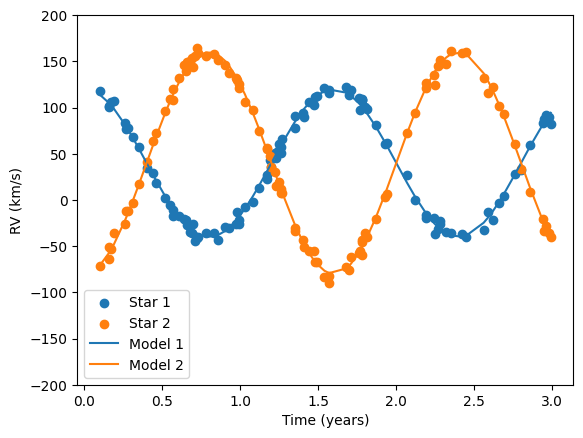

In [10]:
# code here

# orbital period in years
period = 1.6

# center of mass velocity in km/s
V0 = 40

# velocity semiamplitude of star 1 in km/s
K1 = 80

# velocity semiamplitude of star 2 in km/s
K2 = 120


# complete this line of code:
model_rv1, model_rv2 = model_RV(time, period, V0, K1, K2)


# plot RV curve
plt.scatter(time, rv1, label='Star 1')
plt.scatter(time, rv2, label='Star 2')
plt.ylim(-200, 200)
plt.plot(time, model_rv1, label='Model 1')
plt.plot(time, model_rv2, label='Model 2')
plt.xlabel('Time (years)')
plt.ylabel('RV (km/s)')
plt.legend()


Now you can estimate the properties of the two stars in the binary system. We know that the ratio of the velocity amplitudes is inversely related to the ratio of the masses of the two stars:
$$\frac{m_2}{m_1} = \frac{K_1}{K_2}$$

and the total mass is related to orbital period and semimajor axis by Kepler's 3rd Law:
$$(m_1+m_2) P^2 = a^3$$

Write some code to calculate:
- the mass ratio of the binary
- the total mass, assuming the semimajor axis (a) is 3 AU


In [11]:
# code here
mratio = K1 / K2
print('mass ratio = ', mratio)


a = 3  # AU
mtot = a**3 / period**2
print('total mass = ', mtot, ' Msun')

mass ratio =  0.6666666666666666
total mass =  10.546874999999998  Msun


Finally, calculate the individual masses of the two stars (probably easiest to do by hand!) and report the answers below.



In [12]:
# answer here

# M1 = 6.33 Msun

# M2 = 4.22 Msun

---
## Bonus [optional]
If you have time leftover, calculate the Doppler shift (in nanometers) of the H-alpha 656.3nm line that you would see for Star 1 and Star 2 to give us these velocities. Then, make a graph of the Doppler shift over time.

In [13]:
# optional code here


---
## Final steps

**Turning in your lab**

If using Colab -- Click File --> Save a copy to Drive. Save the file to your shared Lab folder.


If using Jupyter --
Save this notebook to your computer, then upload it to your shared Lab folder in Google Drive.

\

\

\

\

\

\


\

\

\

\

\

\


\

\

\

\

\

\


\

\

\

\

\

\



In [ ]:
time = np.arange(0, 3, 0.1)

rng = np.random.default_rng()
time = rng.integers(low=0, high=300, size=100)/100


rv1, rv2 = model_RV(time, 1.6, 40, 80, 120)
rv1 = rv1 + rng.standard_normal(len(rv1))*5
rv2 = rv2 + rng.standard_normal(len(rv2))*5


plt.scatter(time, rv1, label='Star 1')
plt.scatter(time, rv2, label='Star 2')
plt.ylim(-200, 200)
plt.xlabel('Time (years)')
plt.ylabel('RV (km/s)')
plt.legend()


In [ ]:
np.savetxt(str("binary_RV2.csv"),np.c_[time, rv1, rv2],fmt='% 5.3f, % 6.3f, % 6.3f')
